[*********************100%***********************]  5 of 5 completed
<ipython-input-8-9e92f384ffd4>:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change()


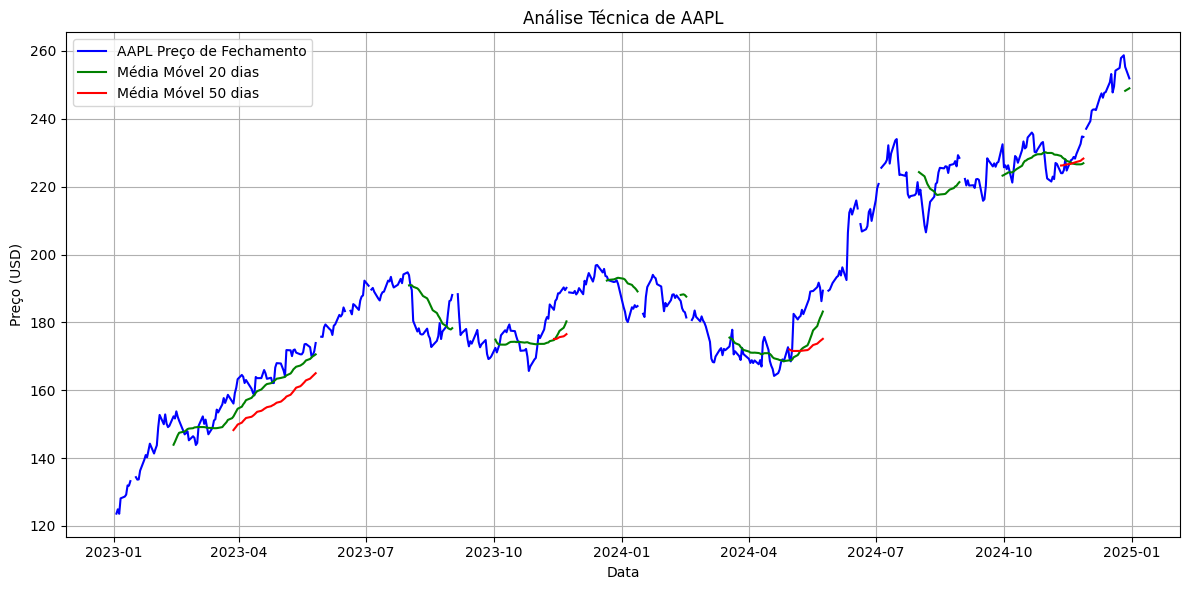

In [8]:
# análise_tecnica_acoes.py

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Lista de ações para análise
tickers = ['AAPL', 'MSFT', 'GOOGL', 'PETR4.SA', 'VALE3.SA']

# Período da análise
start_date = '2023-01-01'
end_date = '2024-12-31'

# Coleta de dados com yfinance (Close Prices)
df = yf.download(tickers, start=start_date, end=end_date)['Close']

# Cálculo dos retornos diários
returns = df.pct_change()

# Cálculo da média móvel de 20 e 50 dias
moving_averages = df.copy()
for ticker in tickers:
    moving_averages[ticker + '_MA20'] = df[ticker].rolling(window=20).mean()
    moving_averages[ticker + '_MA50'] = df[ticker].rolling(window=50).mean()

# Plotando os dados de exemplo com AAPL
fig, ax = plt.subplots(figsize=(12, 6))
ticker = 'AAPL'
ax.plot(df[ticker], label=f'{ticker} Preço de Fechamento', color='blue')
ax.plot(moving_averages[ticker + '_MA20'], label='Média Móvel 20 dias', color='green')
ax.plot(moving_averages[ticker + '_MA50'], label='Média Móvel 50 dias', color='red')
ax.set_title(f'Análise Técnica de {ticker}')
ax.set_xlabel('Data')
ax.set_ylabel('Preço (USD)')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
